In [1]:
import sys
import traceback
import pandas as pd
import numpy as np
import time
from copy import deepcopy

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from scipy import sparse

import pickle

from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
pd.set_option('display.width', 15000)
pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('poster')
%matplotlib inline

In [2]:
from surprise import Dataset, Reader
from surprise import NormalPredictor, BaselineOnly, SVD, SVDpp, NMF, \
SlopeOne, CoClustering, KNNBasic, KNNWithMeans, KNNBaseline

In [3]:
from recommender import plot_cm, print_results, IO
from recommender import ModeClassifier, BaselineMean, BaselineRegression, ALS1, ALS2, RS_surprise

In [4]:
%%time
# Load data

fig_dir = 'figs/modeling/Toronto/'

data_dir = 'data/Toronto/'
dfb = pd.read_pickle(data_dir + 'business.pkl')
dfr = pd.read_pickle(data_dir + 'review.pkl')
dfu = pd.read_pickle(data_dir + 'user.pkl')
datar = pd.read_pickle(data_dir + 'data_review.pkl')

Wall time: 797 ms


In [5]:
print(dfb.shape)
print(dfu.shape)
print(datar.shape)

del dfb
del dfu
del dfr

datar.head()

(12118, 93)
(77506, 22)
(331407, 3)


,user_id,business_id,stars
0,450,21,4
1,451,21,5
2,452,21,5
3,453,21,5
4,454,21,5


In [6]:
# Split the dataset into a training set a test set

X_train, X_test, y_train, y_test = train_test_split(datar[['user_id', 'business_id']].values, datar['stars'].values, \
                                                   test_size=0.4, random_state=0)

In [7]:
models = [ModeClassifier(), RS_surprise(NormalPredictor()), BaselineMean(), BaselineRegression(), \
          RS_surprise(BaselineOnly()), RS_surprise(KNNBasic()), RS_surprise(KNNWithMeans()), RS_surprise(KNNBaseline()), \
          ALS1(), ALS2(), RS_surprise(SVD()), RS_surprise(SVDpp()), RS_surprise(NMF()), RS_surprise(SlopeOne()), \
          RS_surprise(CoClustering())]
model_names = ['Mode estimator', 'Normal predictor*', 'Baseline (mean)', 'Baseline (regression)', \
              'Baseline (ALS)*', 'KNN (basic)*', 'KNN (with means)*', 'KNN (baseline)*', \
              'SVD-ALS1', 'SVD-ALS2', 'SVD-SGD*', 'SVD++-SGD*', 'NMF-SGD*', 'Slope one*', 'Co-clustering*']
test = [True, True, True, True, \
       True, False, False, False, \
       True, True, True, True, True, True, True]
fignames = [fig_dir + str(i) + 'cm.png' for i in range(len(models))]

In [8]:
%%time

estimators = []
is_successful = []

for i, model in enumerate(models):
    try:
        print(model_names[i] + '...')
        if not test[i]:
            print('Estimator not tested')
            estimators.append(model)
            is_successful.append(False)
            print()
            continue
        model.fit(X_train, y_train)
        estimators.append(model)
        print(model_names[i] + ' successful.')
        is_successful.append(True)
        print()
    except:
        traceback.print_exc()
        print(model_names[i] + ' failed.')
        is_successful.append(False)
        print()

try:
    IO(data_dir + 'results/estimators.pkl').to_pickle(estimators)
    print('Saving to pickle successful.')
except:
    traceback.print_exc()
    print('Saving to pickle failed')

IO(data_dir + 'results/is_successful.pkl').to_pickle(is_successful)

Mode estimator...
Mode estimator successful.

Normal predictor*...
Normal predictor* successful.

Baseline (mean)...
Baseline (mean) successful.

Baseline (regression)...
Baseline (regression) successful.

Baseline (ALS)*...
Estimating biases using als...
Baseline (ALS)* successful.

KNN (basic)*...
Estimator not tested

KNN (with means)*...
Estimator not tested

KNN (baseline)*...
Estimator not tested

SVD-ALS1...
SVD-ALS1 successful.

SVD-ALS2...
SVD-ALS2 successful.

SVD-SGD*...
SVD-SGD* successful.

SVD++-SGD*...
SVD++-SGD* successful.

NMF-SGD*...
NMF-SGD* successful.

Slope one*...
Slope one* successful.

Co-clustering*...
Co-clustering* successful.

Saving to pickle successful.
Wall time: 14min 12s


Mode estimator
Fitting time: 0.0 s.
RMSE on training set: 1.8829746494859956.
RMSE on test set: 1.877848713148555.
r2 on training set: -1.117289964835647.
r2 on test set: -1.1175732518371557.
Classification accuracy on training set: 0.31162619943272113.
Classification accuracy on test set: 0.31083333961965254.


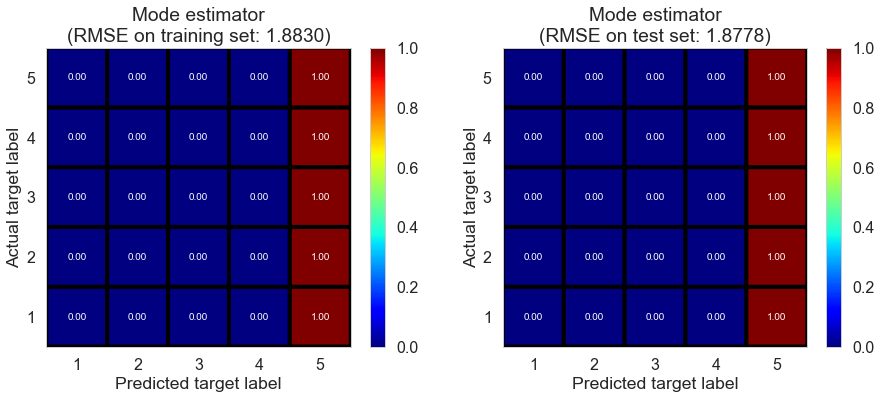


Normal predictor*
Fitting time: 0.8274052143096924 s.
RMSE on training set: 1.703369528040004.
RMSE on test set: 1.7024023667141022.
r2 on training set: -0.7397526298938595.
r2 on test set: -0.7451349578435256.
Classification accuracy on training set: 0.2340377381263704.
Classification accuracy on test set: 0.23545785777328515.


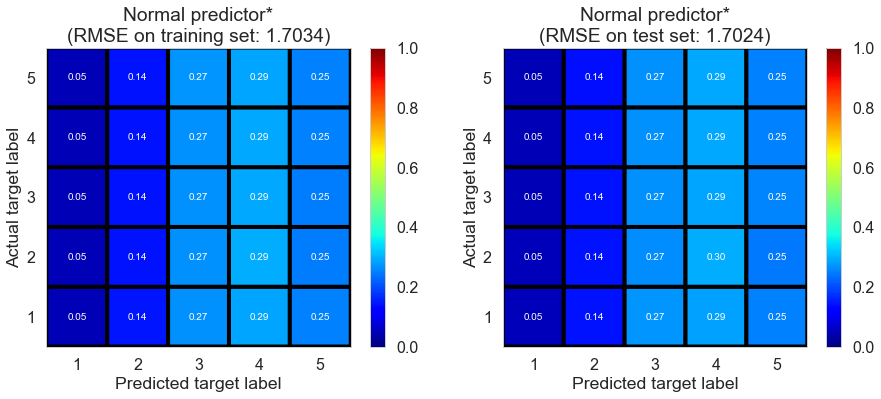


Baseline (mean)
Fitting time: 0.218400239944458 s.
RMSE on training set: 0.9292706880015138.
RMSE on test set: 1.2920216326570384.
r2 on training set: 0.4843252464992065.
r2 on test set: -0.00243636090993804.
Classification accuracy on training set: 0.5162036571382591.
Classification accuracy on test set: 0.3620165506212141.


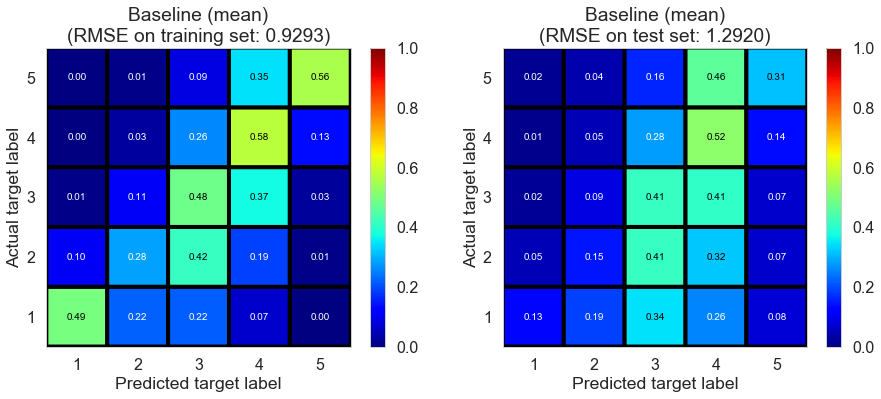


Baseline (regression)
Fitting time: 0.8736057281494141 s.
RMSE on training set: 0.8780071589062368.
RMSE on test set: 1.1841926826897617.
r2 on training set: 0.5396506791298913.
r2 on test set: 0.15790325793195925.
Classification accuracy on training set: 0.4435939731648931.
Classification accuracy on test set: 0.3445305251088162.


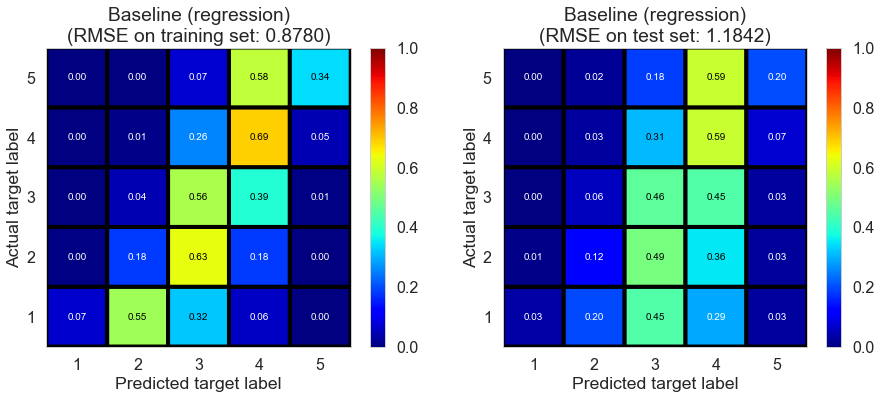


Baseline (ALS)*
Fitting time: 1.6990065574645996 s.
RMSE on training set: 1.091641858047857.
RMSE on test set: 1.1742220317041583.
r2 on training set: 0.2883740890562593.
r2 on test set: 0.17202411089927505.
Classification accuracy on training set: 0.3304198265977349.
Classification accuracy on test set: 0.31409216749771807.


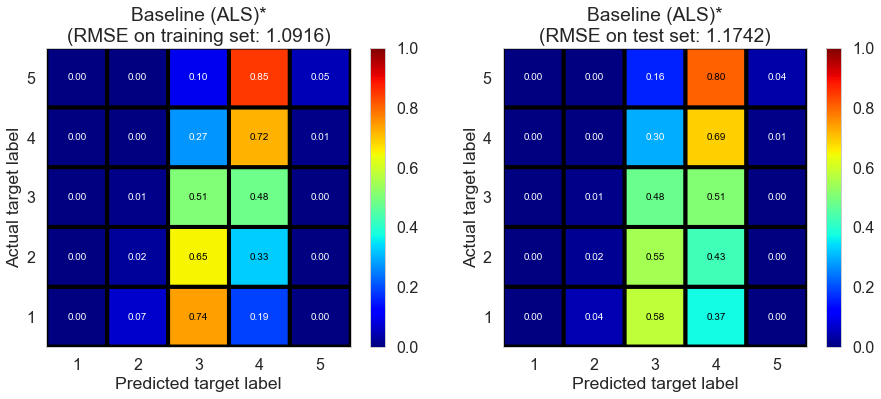


SVD-ALS1
Fitting time: 312.28941798210144 s.
RMSE on training set: 0.5553959553107437.
RMSE on test set: 1.1754331484116025.
r2 on training set: 0.8157969494587467.
r2 on test set: 0.1703152474183578.
Classification accuracy on training set: 0.707484259017119.
Classification accuracy on test set: 0.3208813922436879.


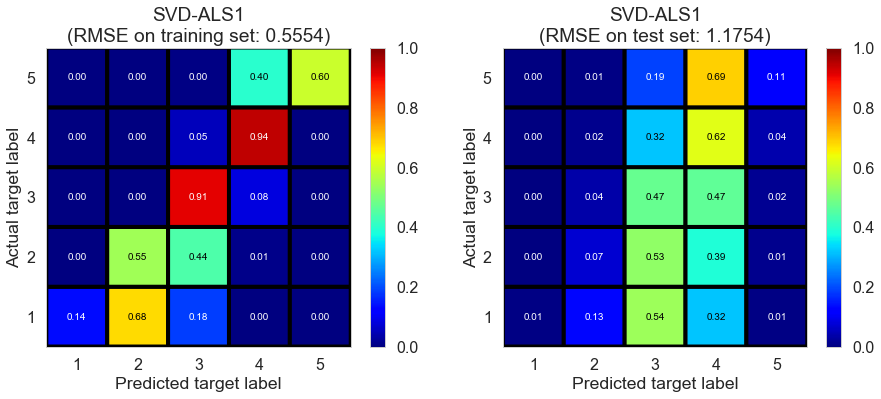


SVD-ALS2
Fitting time: 344.9593484401703 s.
RMSE on training set: 0.5569988889254944.
RMSE on test set: 1.1800759448830125.
r2 on training set: 0.8147321547198502.
r2 on test set: 0.16374802581014525.
Classification accuracy on training set: 0.6992064130675303.
Classification accuracy on test set: 0.3120176821586717.


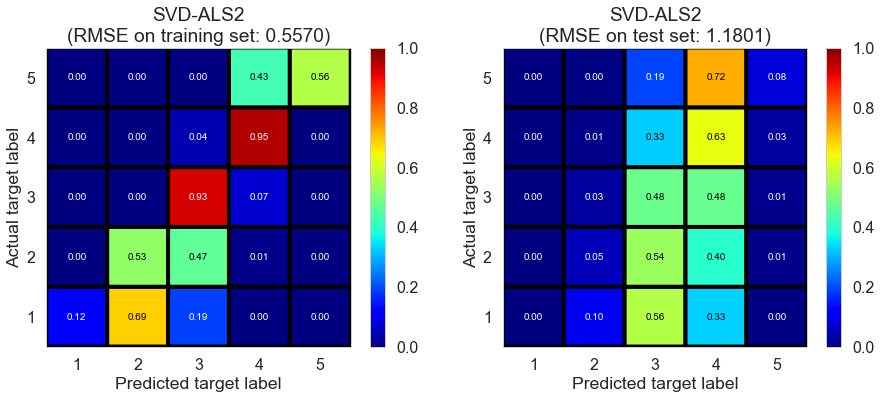


SVD-SGD*
Fitting time: 17.52583122253418 s.
RMSE on training set: 0.8222141474582707.
RMSE on test set: 1.1785728010209484.
r2 on training set: 0.5962976446387123.
r2 on test set: 0.16587705226722627.
Classification accuracy on training set: 0.44191929351652554.
Classification accuracy on test set: 0.3185202507487006.


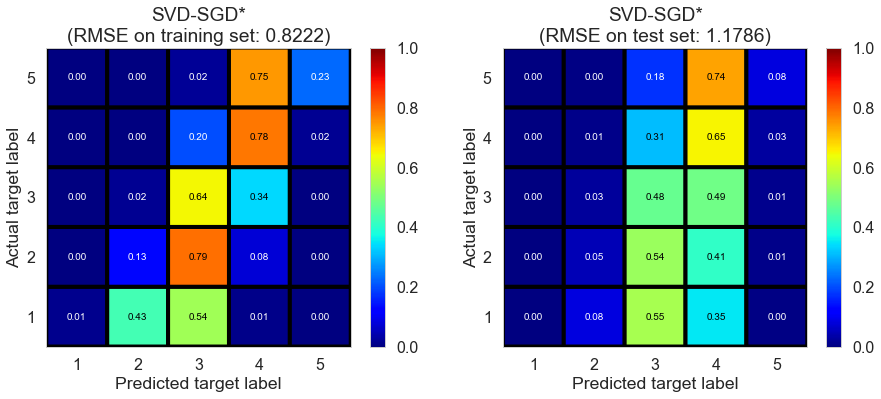


SVD++-SGD*
Fitting time: 114.36241722106934 s.
RMSE on training set: 0.8729976540706389.
RMSE on test set: 1.1776365158949336.
r2 on training set: 0.5448887760855363.
r2 on test set: 0.16720181845157223.
Classification accuracy on training set: 0.428521856329585.
Classification accuracy on test set: 0.3216432941318467.


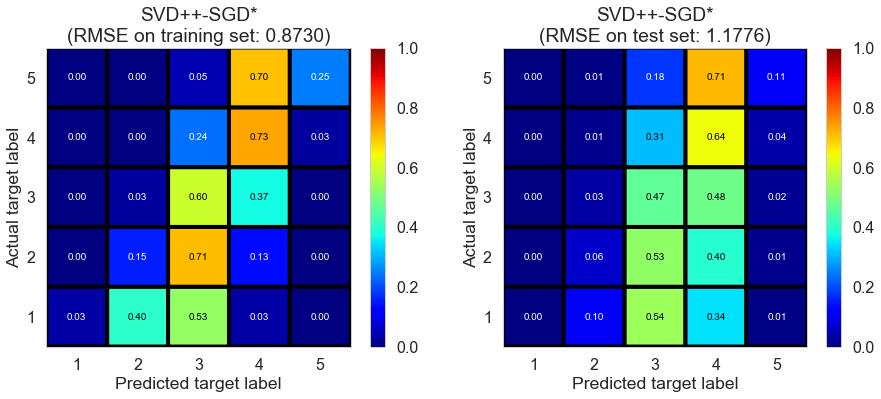


NMF-SGD*
Fitting time: 20.084235668182373 s.
RMSE on training set: 0.4094035725562228.
RMSE on test set: 1.340347840241003.
r2 on training set: 0.8999090873982464.
r2 on test set: -0.07882817115698137.
Classification accuracy on training set: 0.8317324133491582.
Classification accuracy on test set: 0.31278712762988164.


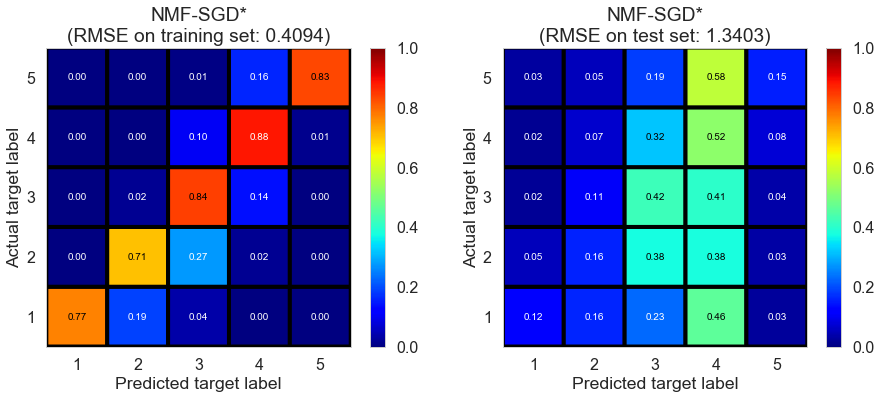


Slope one*
Fitting time: 6.601811647415161 s.
RMSE on training set: 0.295860037147659.
RMSE on test set: 1.3713747311803155.
r2 on training set: 0.94772861496786.
r2 on test set: -0.1293525235960742.
Classification accuracy on training set: 0.9060368932429442.
Classification accuracy on test set: 0.32548297790484526.


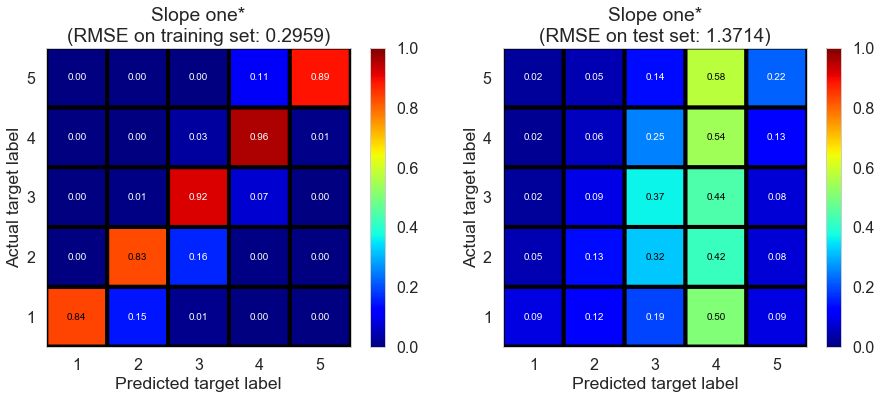


Co-clustering*
Fitting time: 16.423035383224487 s.
RMSE on training set: 0.834445565285159.
RMSE on test set: 1.2946972184593235.
r2 on training set: 0.5841971950733185.
r2 on test set: -0.006592454814311699.
Classification accuracy on training set: 0.5401470499487036.
Classification accuracy on test set: 0.3516290367598802.


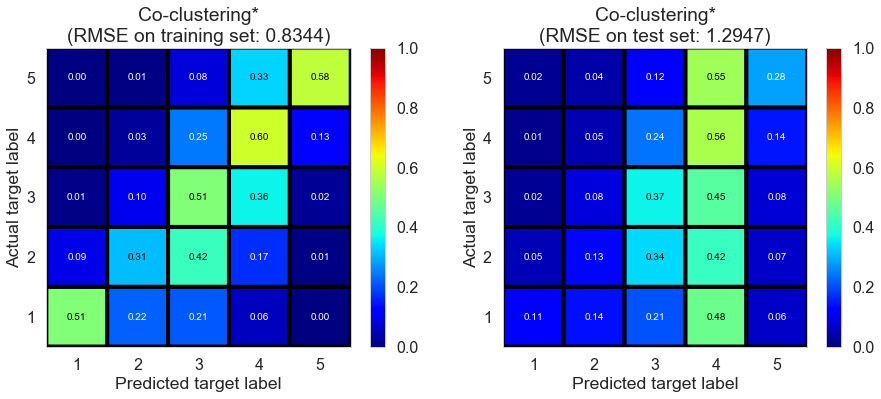


Wall time: 3min 37s


In [9]:
%%time

estimators = IO(data_dir + 'results/estimators.pkl').read_pickle()
is_successful = IO(data_dir + 'results/is_successful.pkl').read_pickle()

for i in range(len(estimators)):
    if is_successful[i]:
        print_results(estimators[i], model_names[i], X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
                      figname=fignames[i])

del estimators